# Import Relevant Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [3]:
# Import raw data
df = pd.read_csv('t30_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,139.622192,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
0,692.0,951.0,1152.0,1229.0,1332.0,1464.0,1445.0,1590.0,1678.0,1805.0,...,2294.0,2295.0,2372.0,2325.0,2418.0,2315.0,2364.0,2386.0,2353.0,2362.0
1,742.0,944.0,1212.0,1314.0,1397.0,1508.0,1530.0,1679.0,1817.0,1952.0,...,2603.0,2531.0,2562.0,2618.0,2425.0,2684.0,2529.0,2595.0,2458.0,2572.0
2,812.0,1021.0,1216.0,1347.0,1545.0,1607.0,1675.0,1707.0,1983.0,2096.0,...,2766.0,2652.0,2629.0,2702.0,2882.0,2710.0,2809.0,2776.0,2766.0,2714.0
3,838.0,1091.0,1245.0,1352.0,1504.0,1618.0,1722.0,1808.0,1967.0,2066.0,...,2968.0,3060.0,2936.0,3009.0,2985.0,2957.0,2944.0,3003.0,2960.0,2937.0
4,913.0,1085.0,1294.0,1502.0,1647.0,1687.0,1818.0,1886.0,2113.0,2181.0,...,3219.0,3081.0,3244.0,3148.0,3134.0,3052.0,3180.0,3168.0,3163.0,3243.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,507.0,668.0,698.0,815.0,757.0,854.0,913.0,932.0,1085.0,1140.0,...,1234.0,1162.0,1244.0,1290.0,1194.0,1250.0,1222.0,1251.0,1386.0,1202.0
491,476.0,680.0,713.0,788.0,831.0,910.0,887.0,1030.0,1047.0,1188.0,...,1277.0,1270.0,1288.0,1197.0,1294.0,1338.0,1305.0,1303.0,1322.0,1236.0
492,601.0,690.0,824.0,851.0,793.0,1009.0,847.0,1046.0,1198.0,1171.0,...,1312.0,1332.0,1330.0,1279.0,1347.0,1236.0,1295.0,1279.0,1336.0,1333.0
493,536.0,630.0,772.0,836.0,830.0,930.0,943.0,1076.0,1114.0,1100.0,...,1231.0,1304.0,1258.0,1290.0,1225.0,1340.0,1281.0,1271.0,1275.0,1334.0


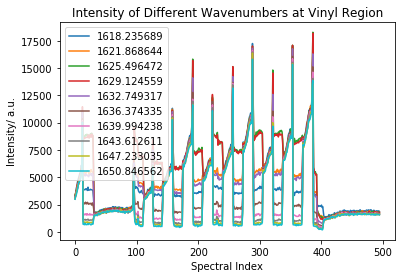

In [4]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region')
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [5]:
# df.loc[:,'1629.559307'] --> When using loc.
# df.columns.get_loc('1629.124559') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label 1629.559307. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

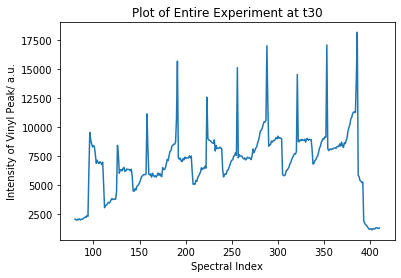

In [6]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[80:410,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t30')
plt.show()

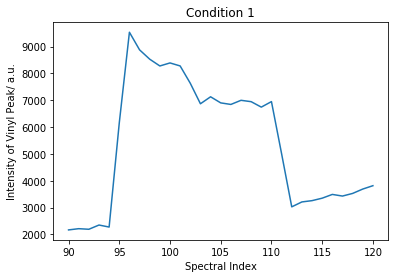

In [6]:
# Condition
df.loc[90:120,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1')
plt.show()

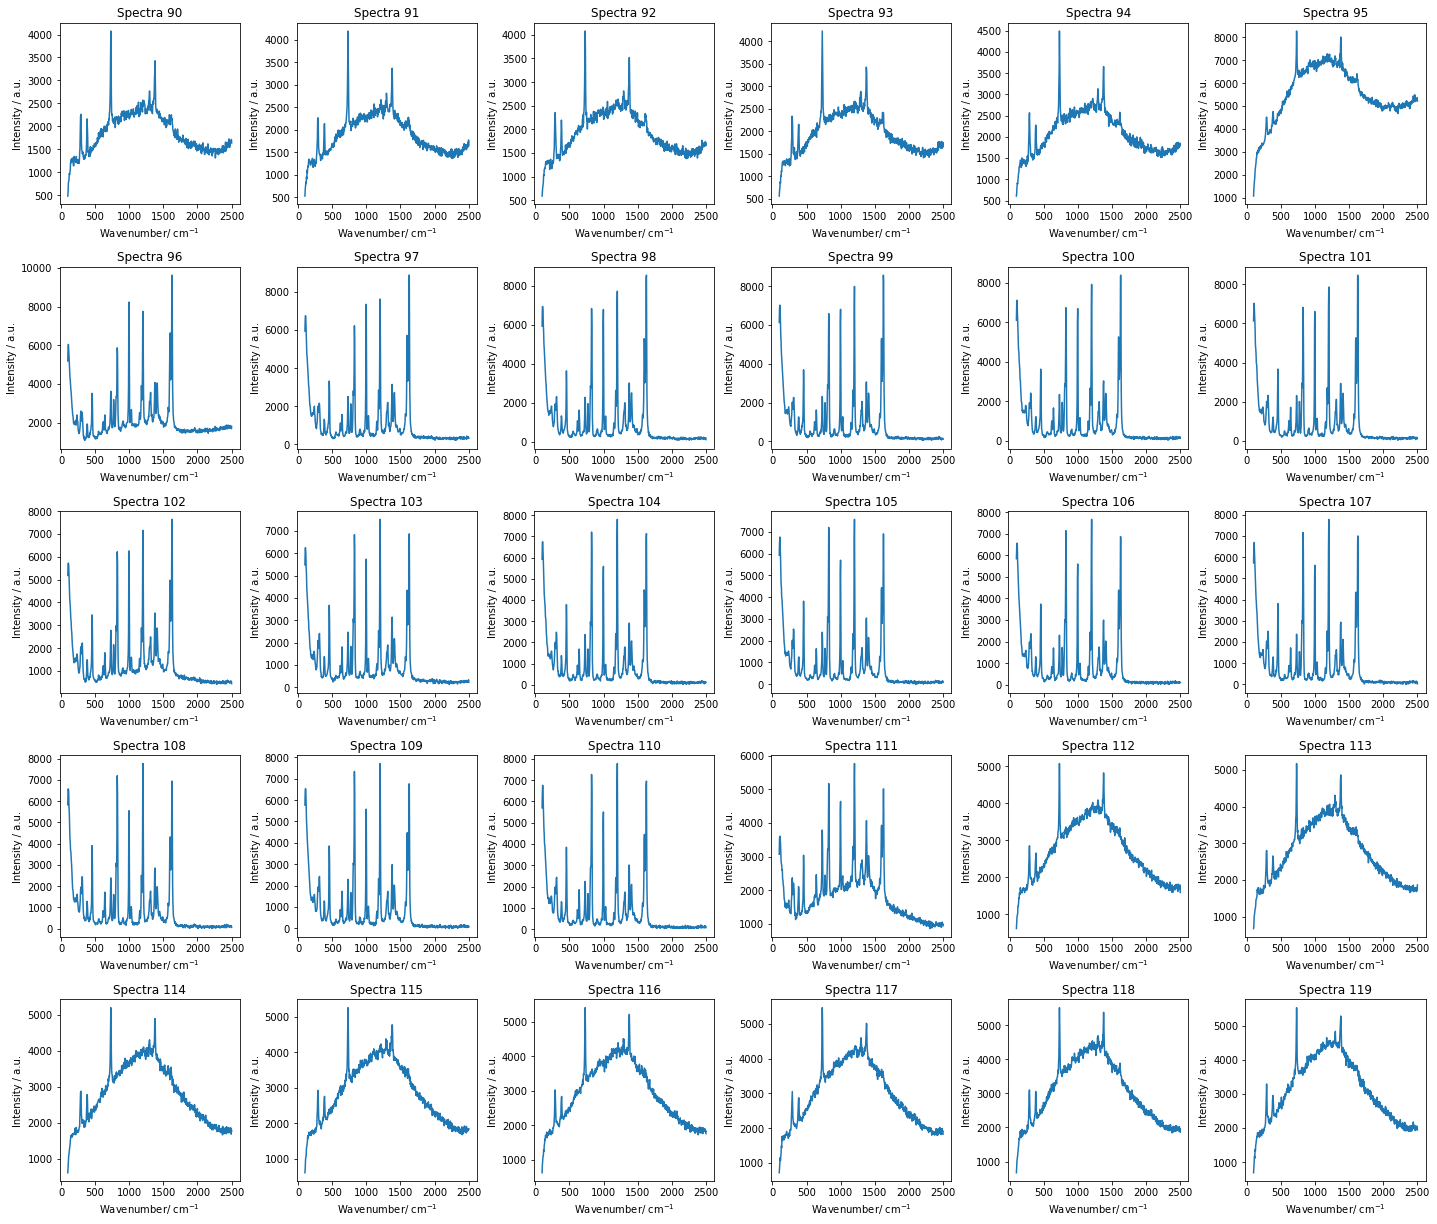

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(90, 120):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-89))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[103:107, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =1)
condition1_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
103,1,5489.0,6203.0,6250.0,5976.0,5345.0,5080.0,4461.0,4223.0,3902.0,...,305.0,237.0,240.0,262.0,240.0,273.0,271.0,290.0,341.0,224.0
104,1,5916.0,6719.0,6744.0,6355.0,5875.0,5275.0,4721.0,4271.0,4076.0,...,152.0,43.0,148.0,111.0,118.0,78.0,81.0,126.0,135.0,105.0
105,1,5925.0,6504.0,6762.0,6395.0,5939.0,5333.0,4614.0,4464.0,3992.0,...,123.0,36.0,79.0,111.0,124.0,104.0,141.0,120.0,134.0,80.0
106,1,5848.0,6371.0,6569.0,6432.0,5708.0,5268.0,4717.0,4287.0,4102.0,...,100.0,62.0,127.0,63.0,108.0,116.0,100.0,92.0,116.0,100.0
107,1,5728.0,6429.0,6689.0,6217.0,5782.0,5195.0,4674.0,4483.0,4093.0,...,70.0,39.0,135.0,101.0,148.0,133.0,107.0,96.0,107.0,22.0


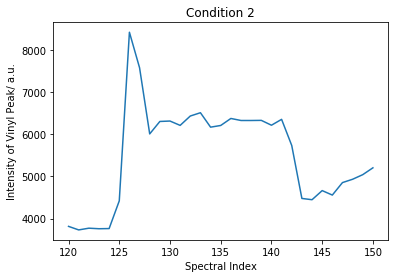

In [9]:
# Condition
df.loc[120:150,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2')
plt.show()

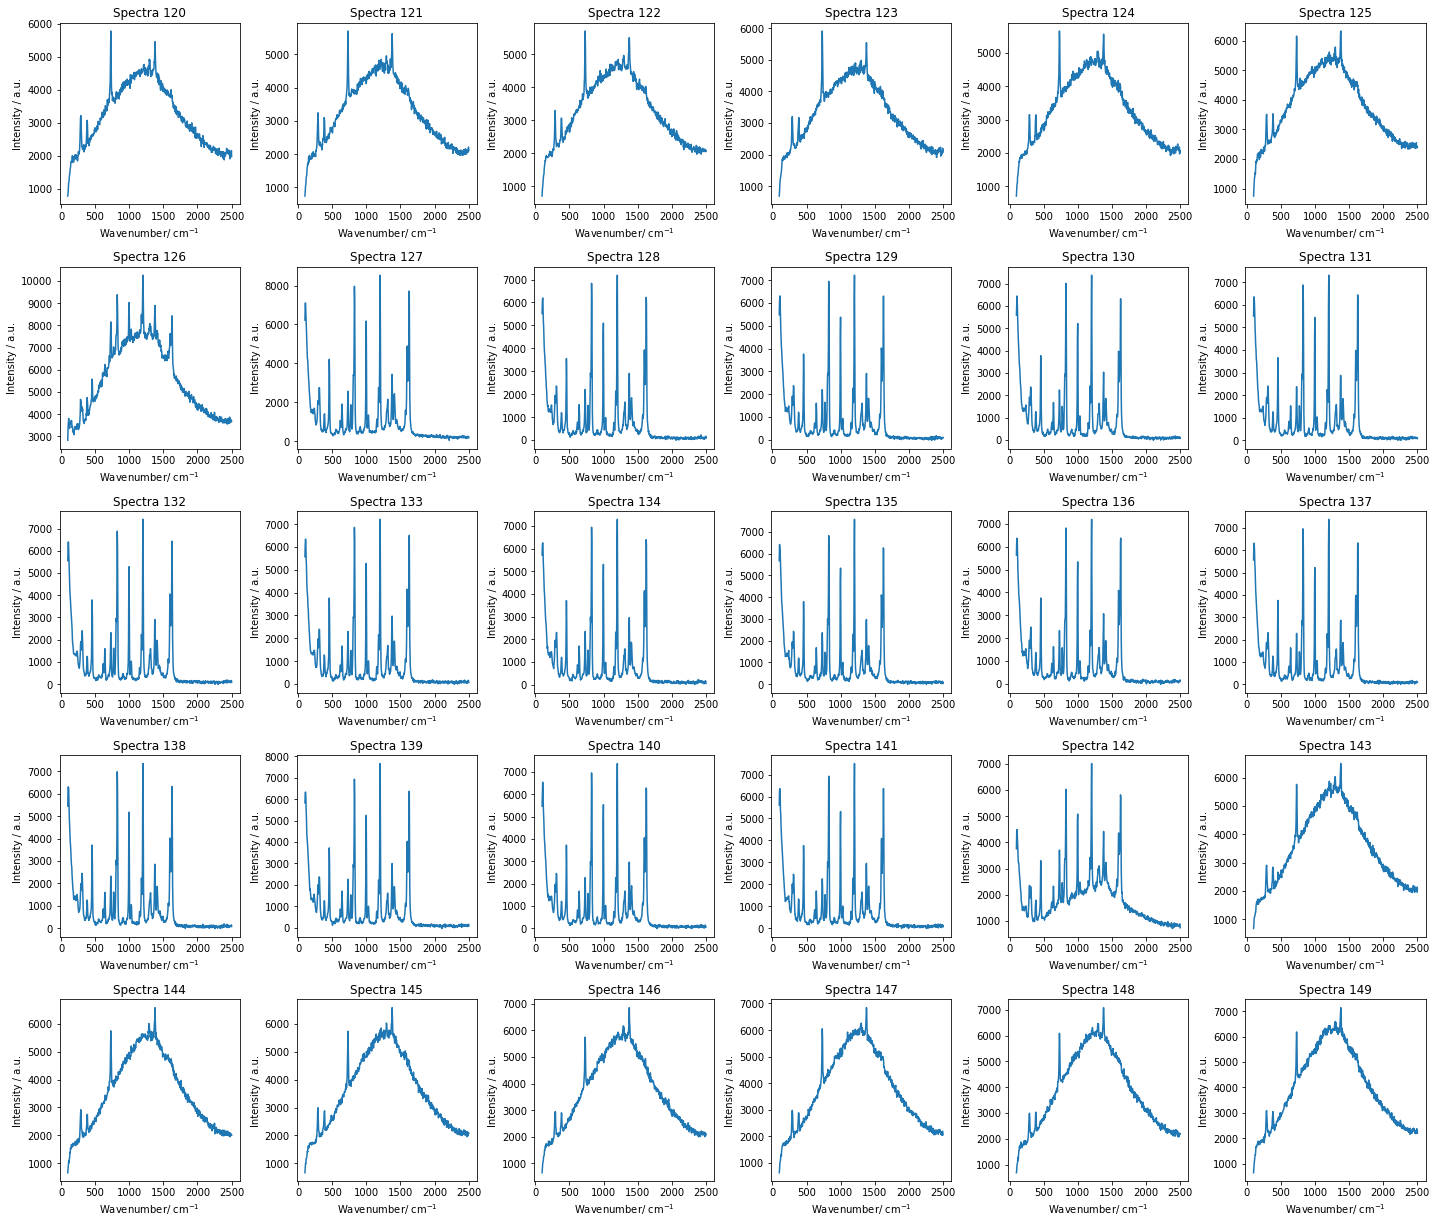

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(120, 150):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-119))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[132:136, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =2)
condition2_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
132,2,5560.0,6136.0,6403.0,6055.0,5541.0,5205.0,4591.0,4121.0,3947.0,...,88.0,93.0,153.0,67.0,70.0,118.0,112.0,76.0,163.0,84.0
133,2,5577.0,6098.0,6344.0,6185.0,5473.0,5162.0,4512.0,4125.0,3960.0,...,58.0,26.0,121.0,65.0,129.0,101.0,161.0,144.0,146.0,62.0
134,2,5716.0,6153.0,6258.0,6009.0,5381.0,5048.0,4527.0,4173.0,3982.0,...,135.0,38.0,125.0,97.0,121.0,71.0,96.0,168.0,123.0,47.0
135,2,5674.0,6416.0,6263.0,6063.0,5600.0,4992.0,4534.0,4268.0,3778.0,...,53.0,22.0,117.0,66.0,107.0,131.0,66.0,97.0,108.0,31.0
136,2,5636.0,6222.0,6374.0,6180.0,5512.0,4941.0,4612.0,4200.0,3862.0,...,48.0,43.0,92.0,110.0,126.0,144.0,93.0,126.0,176.0,122.0


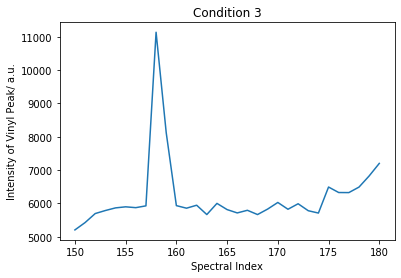

In [12]:
# Condition
df.loc[150:180,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3')
plt.show()

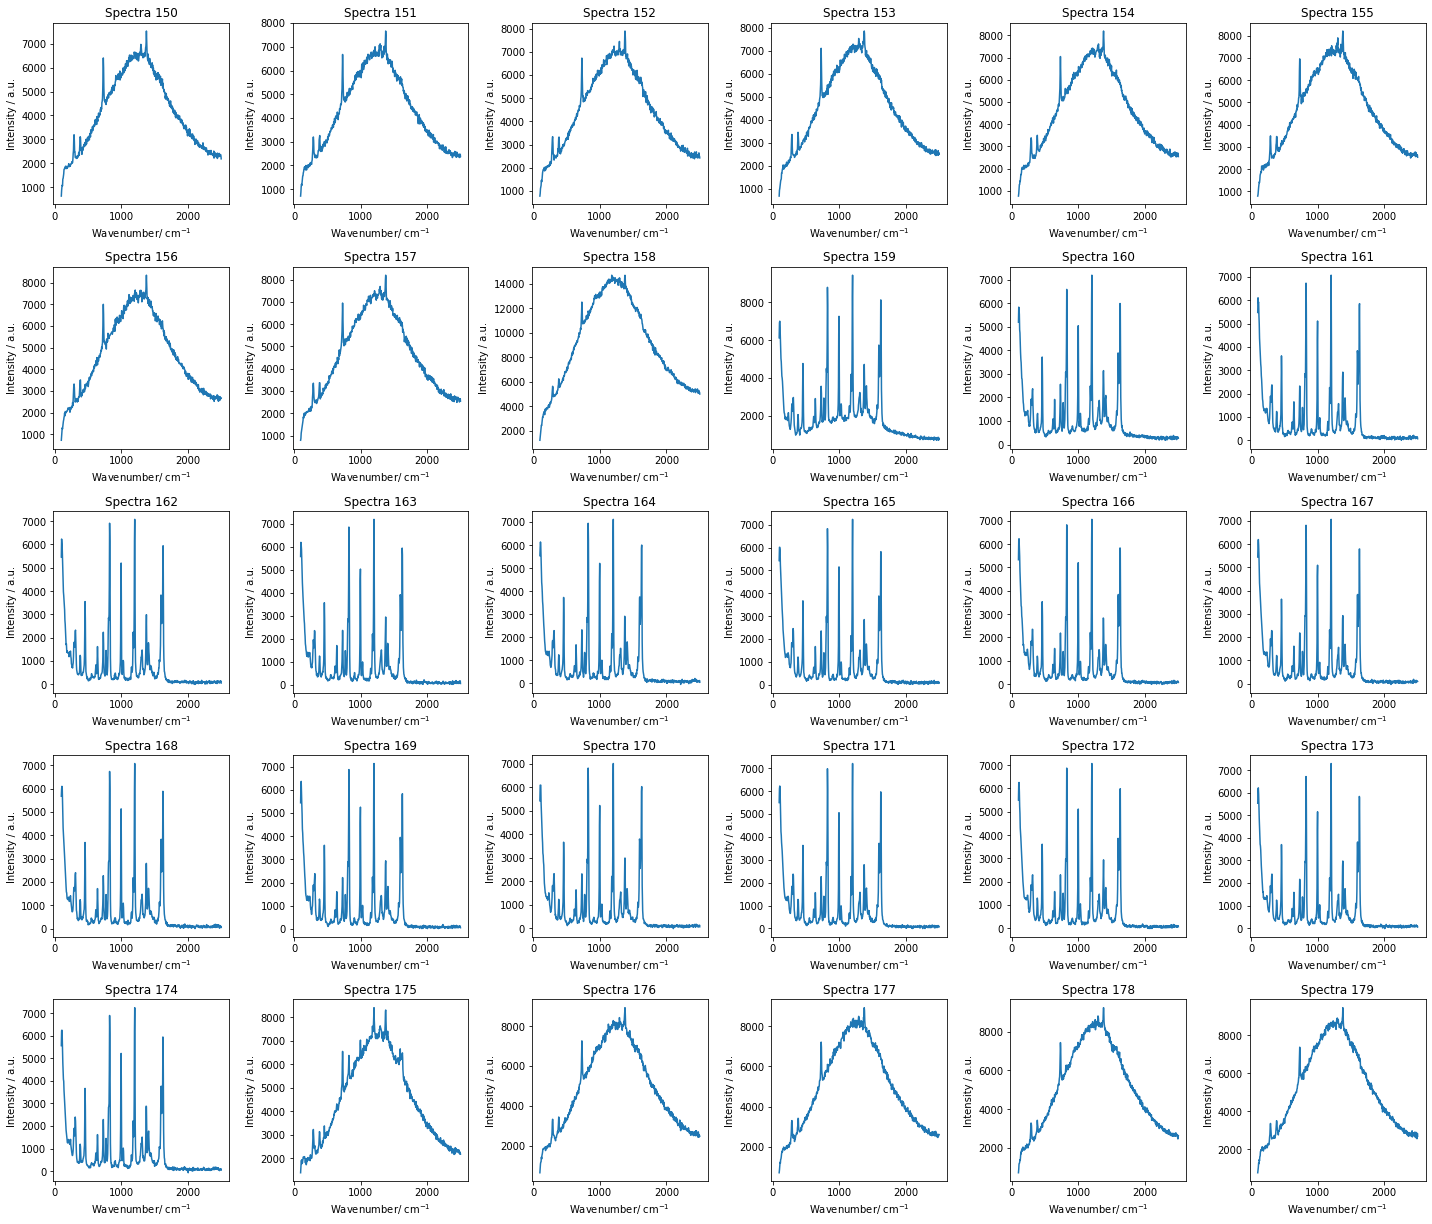

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(150, 180):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-149))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[165:169, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =3)
condition3_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
165,3,5428.0,6012.0,6010.0,5900.0,5273.0,4926.0,4503.0,4157.0,3813.0,...,117.0,86.0,108.0,76.0,137.0,68.0,97.0,87.0,118.0,59.0
166,3,5330.0,6170.0,6229.0,5886.0,5480.0,4862.0,4517.0,4048.0,3820.0,...,46.0,78.0,113.0,71.0,83.0,106.0,139.0,129.0,89.0,76.0
167,3,5444.0,5996.0,6197.0,5968.0,5531.0,4875.0,4328.0,4130.0,3864.0,...,109.0,47.0,148.0,109.0,133.0,91.0,119.0,108.0,108.0,100.0
168,3,5678.0,5992.0,6102.0,6080.0,5472.0,4807.0,4319.0,4083.0,3882.0,...,71.0,17.0,119.0,107.0,83.0,127.0,103.0,49.0,86.0,49.0
169,3,5439.0,6133.0,6363.0,5822.0,5369.0,4950.0,4312.0,4130.0,3785.0,...,115.0,88.0,76.0,73.0,110.0,95.0,135.0,102.0,91.0,50.0


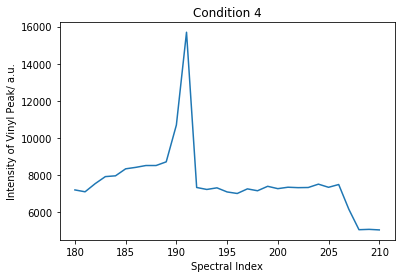

In [15]:
# Condition
df.loc[180:210,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4')
plt.show()

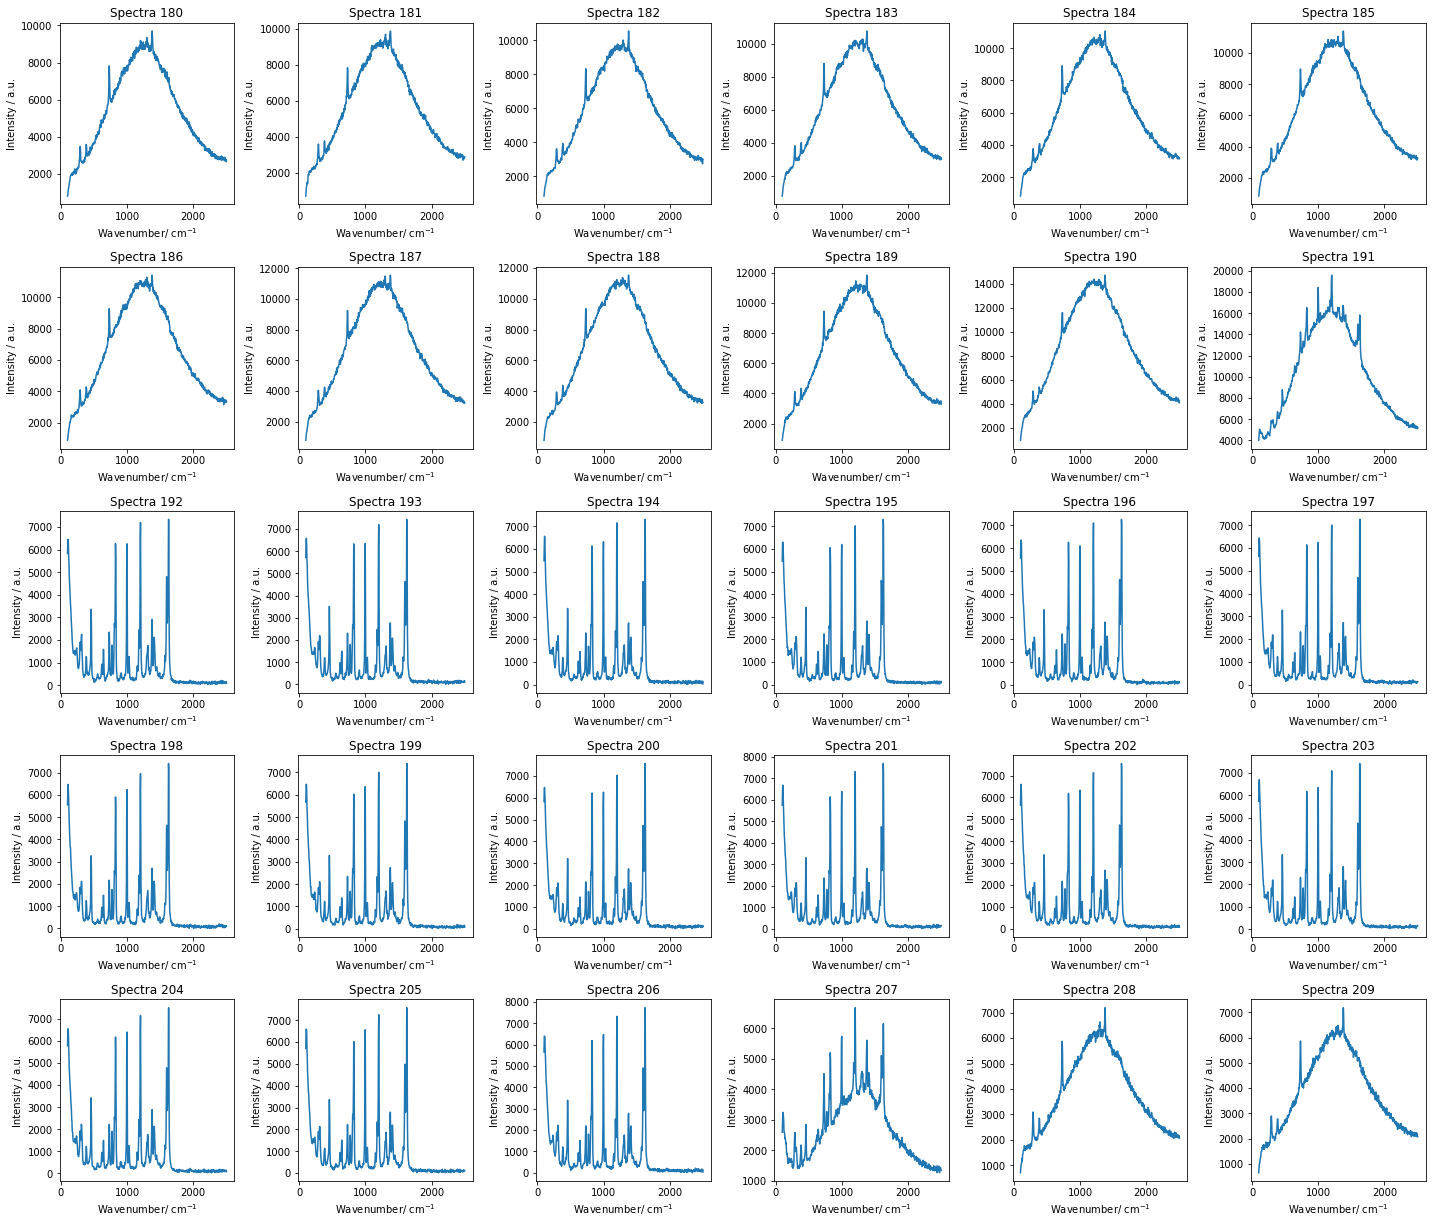

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(180, 210):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-179))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[196:200, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =4)
condition4_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
196,4,5572.0,6136.0,6361.0,6257.0,5497.0,5028.0,4592.0,4203.0,3979.0,...,87.0,51.0,68.0,151.0,75.0,108.0,150.0,127.0,142.0,104.0
197,4,5637.0,6328.0,6441.0,6156.0,5543.0,5224.0,4450.0,4216.0,3883.0,...,136.0,77.0,123.0,84.0,96.0,87.0,124.0,120.0,101.0,134.0
198,4,5553.0,6159.0,6465.0,6145.0,5619.0,5109.0,4522.0,4237.0,3908.0,...,130.0,46.0,125.0,100.0,97.0,118.0,82.0,128.0,122.0,95.0
199,4,5666.0,6161.0,6471.0,6235.0,5503.0,5163.0,4611.0,4246.0,4040.0,...,113.0,60.0,112.0,130.0,80.0,69.0,155.0,99.0,149.0,80.0
200,4,5824.0,6434.0,6470.0,6131.0,5628.0,5236.0,4680.0,4311.0,4023.0,...,120.0,63.0,152.0,101.0,123.0,137.0,126.0,91.0,149.0,96.0


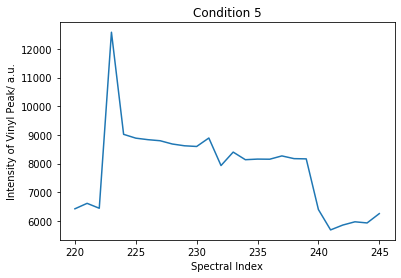

In [18]:
# Condition
df.loc[220:245,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5')
plt.show()

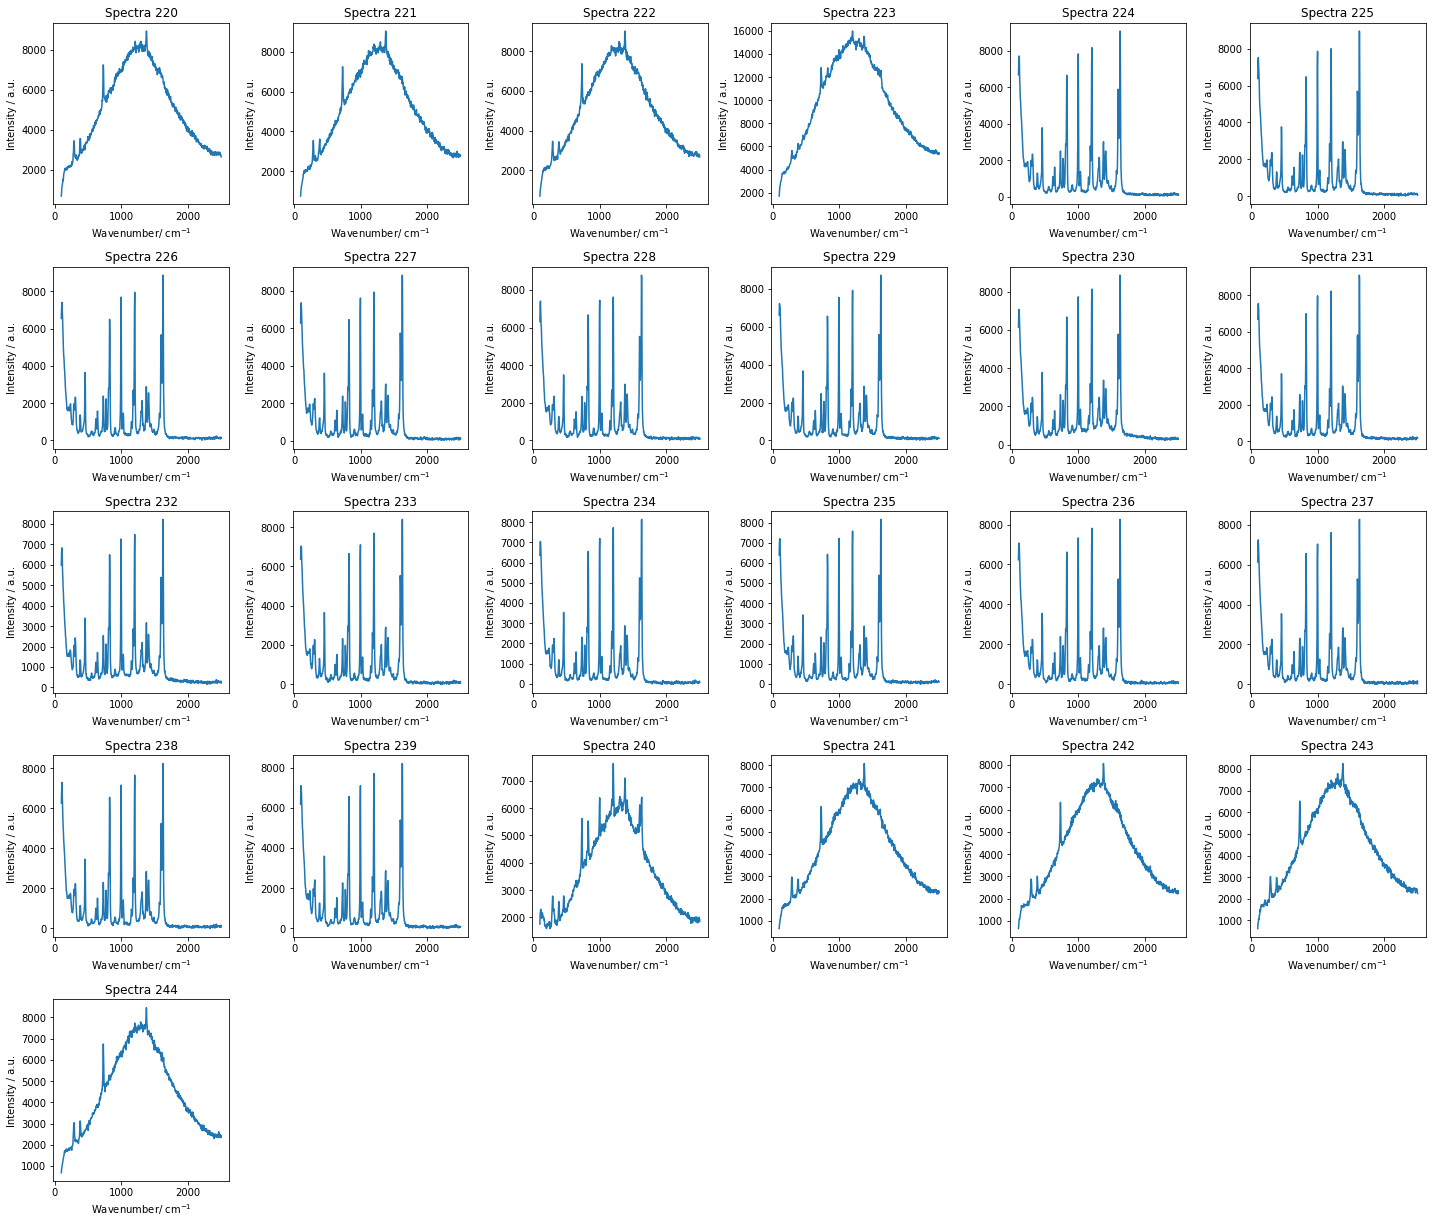

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(220, 245):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-219))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[234:238, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =5)
condition5_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
234,5,6354.0,6971.0,7039.0,6740.0,6212.0,5679.0,4989.0,4721.0,4470.0,...,97.0,34.0,86.0,79.0,107.0,96.0,65.0,141.0,101.0,65.0
235,5,6393.0,7017.0,7197.0,6818.0,6153.0,5731.0,5119.0,4819.0,4360.0,...,68.0,75.0,107.0,114.0,138.0,127.0,123.0,150.0,118.0,99.0
236,5,6238.0,7034.0,7073.0,6847.0,6177.0,5729.0,5014.0,4694.0,4227.0,...,81.0,68.0,108.0,79.0,97.0,108.0,88.0,124.0,113.0,48.0
237,5,6129.0,7131.0,7239.0,6686.0,6147.0,5683.0,5203.0,4766.0,4435.0,...,98.0,41.0,111.0,44.0,127.0,89.0,102.0,113.0,183.0,33.0
238,5,6271.0,6866.0,7298.0,6812.0,6123.0,5626.0,5134.0,4830.0,4396.0,...,106.0,65.0,117.0,69.0,78.0,105.0,128.0,90.0,155.0,66.0


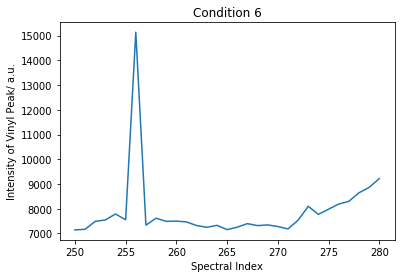

In [21]:
# Condition
df.loc[250:280,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6')
plt.show()

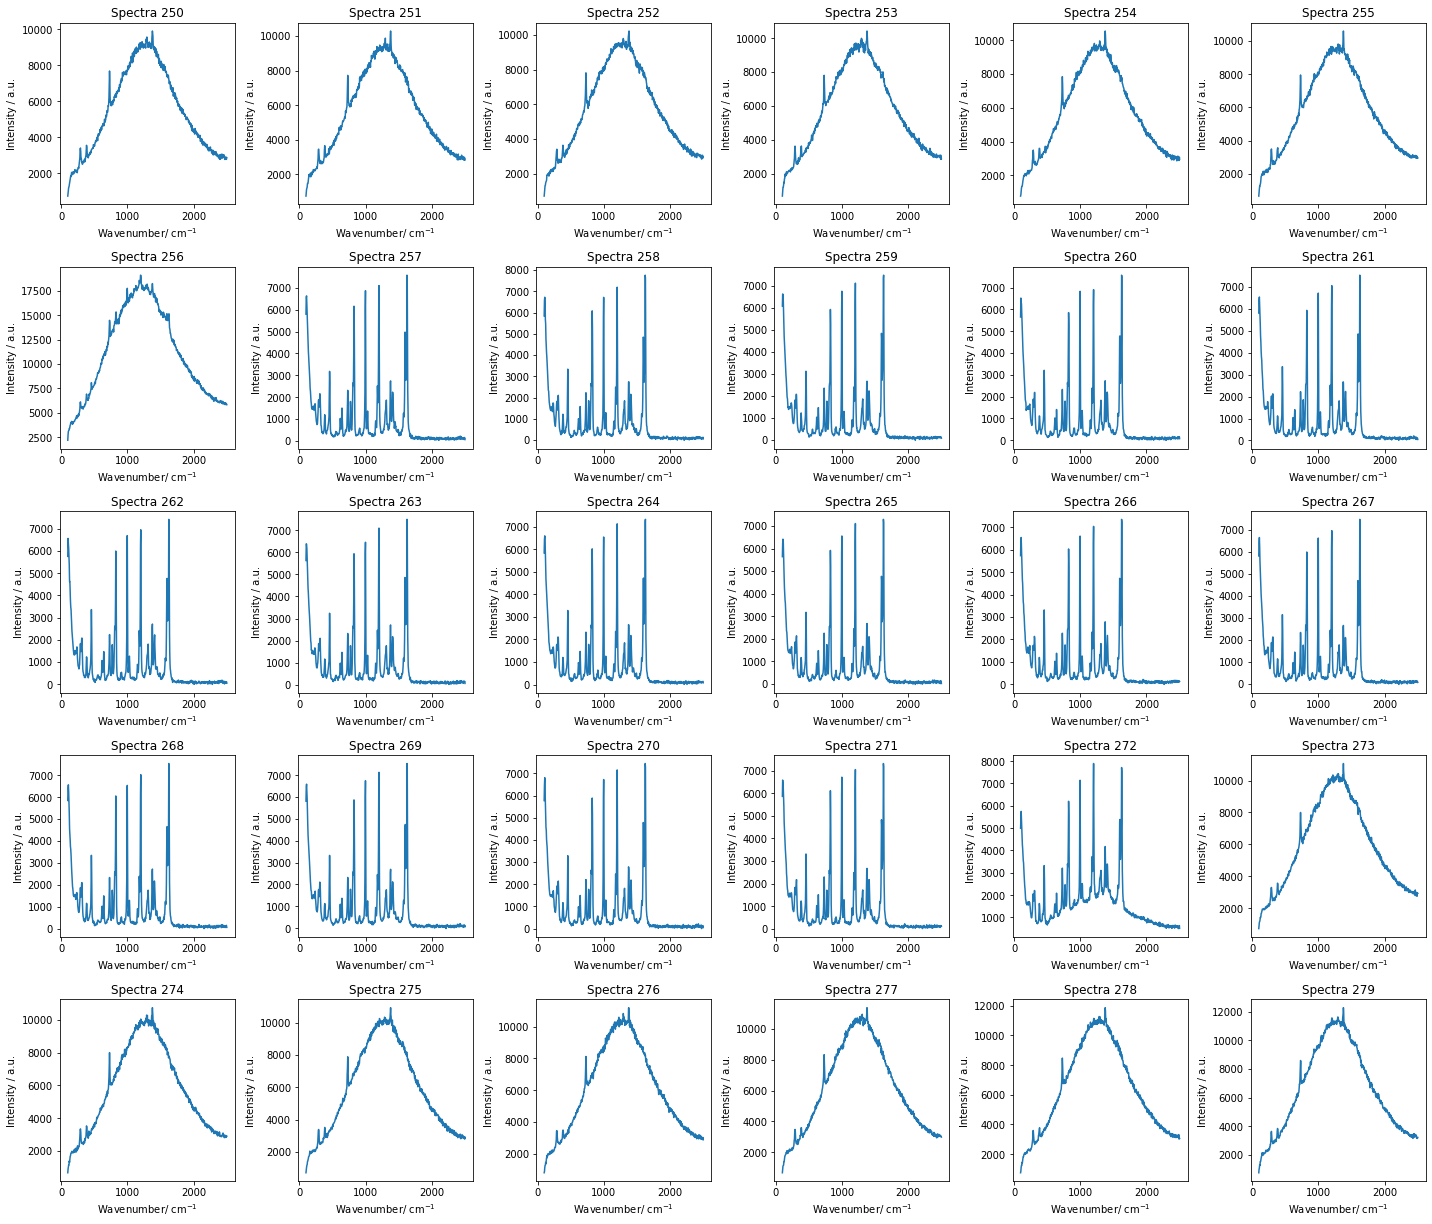

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(250, 280):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-249))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[266:270, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =6)
condition6_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
266,6,5741.0,6482.0,6552.0,6099.0,5802.0,5291.0,4686.0,4476.0,4055.0,...,164.0,81.0,138.0,124.0,111.0,103.0,137.0,116.0,138.0,122.0
267,6,5805.0,6388.0,6639.0,6197.0,5553.0,5220.0,4780.0,4367.0,4031.0,...,152.0,90.0,105.0,87.0,137.0,78.0,127.0,115.0,99.0,70.0
268,6,5848.0,6417.0,6561.0,6221.0,5731.0,5284.0,4566.0,4336.0,4051.0,...,112.0,49.0,107.0,58.0,102.0,100.0,127.0,148.0,113.0,55.0
269,6,5808.0,6445.0,6586.0,6228.0,5896.0,5234.0,4731.0,4261.0,4013.0,...,121.0,34.0,123.0,124.0,67.0,144.0,127.0,81.0,126.0,68.0
270,6,5771.0,6483.0,6804.0,6287.0,5714.0,5430.0,4571.0,4440.0,4014.0,...,158.0,-1.0,122.0,60.0,96.0,77.0,86.0,99.0,130.0,44.0


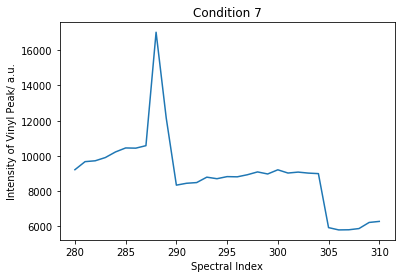

In [24]:
# Condition
df.loc[280:310,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7')
plt.show()

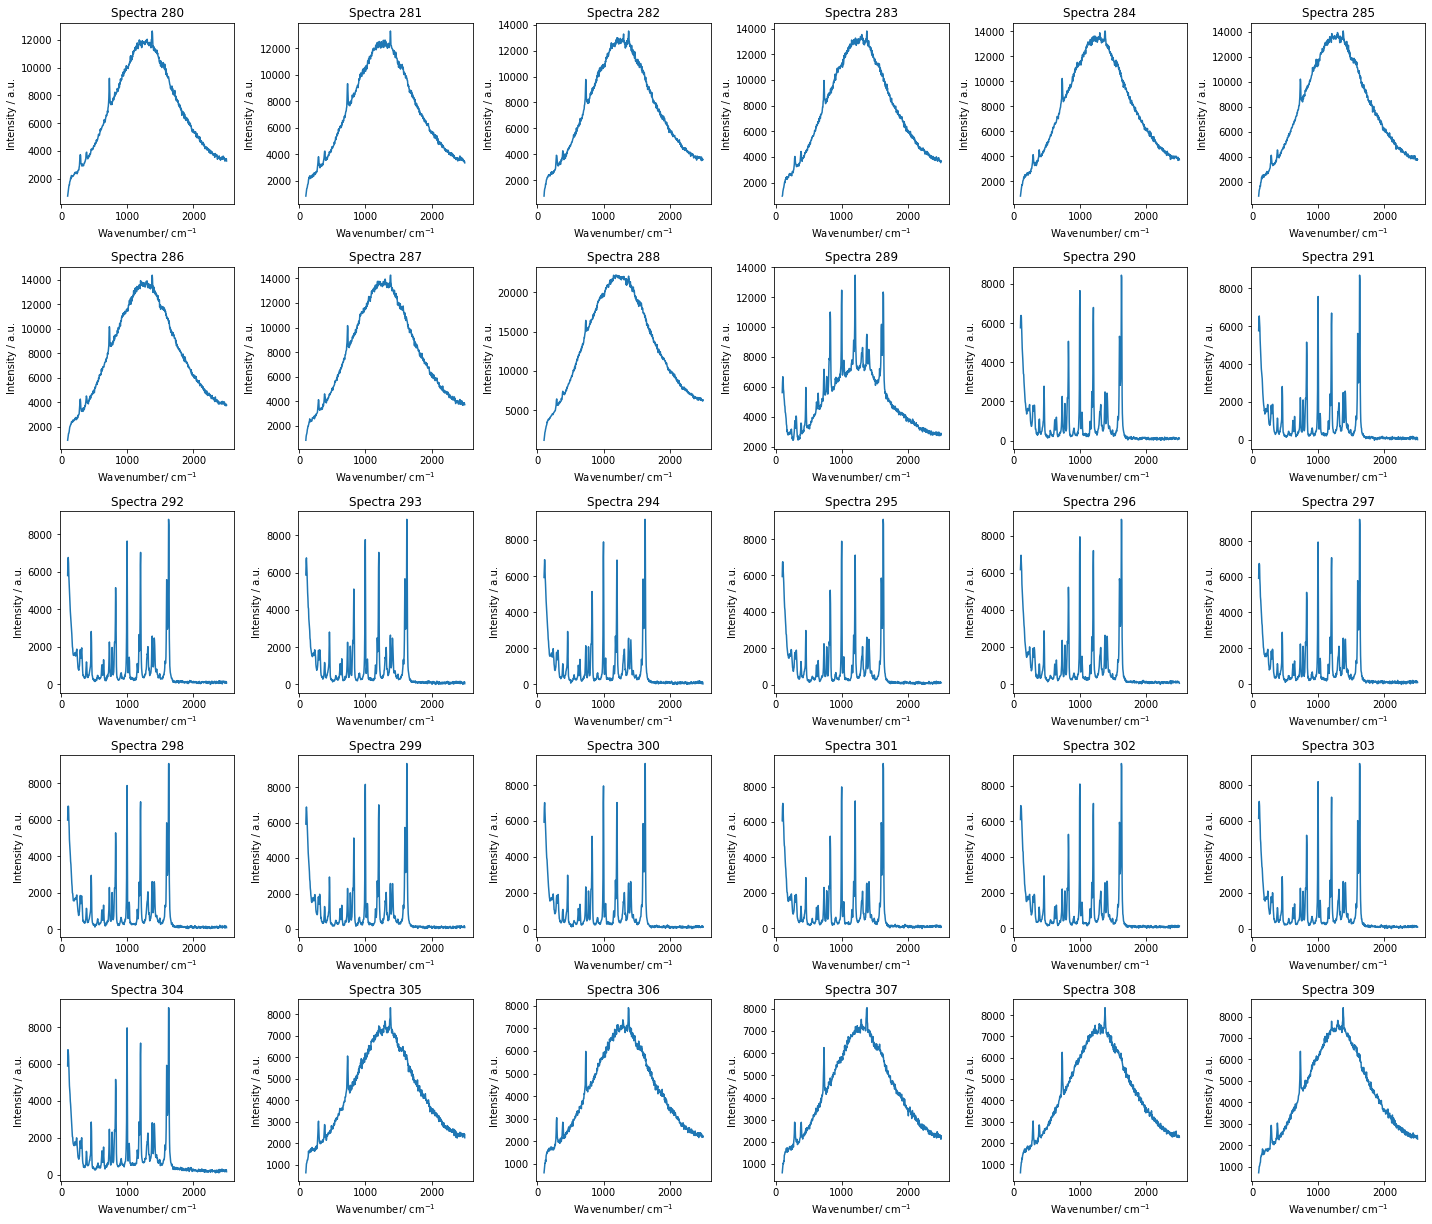

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(280, 310):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-279))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[295:299, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =7)
condition7_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
295,7,5941.0,6721.0,6754.0,6368.0,6009.0,5616.0,5042.0,4622.0,4240.0,...,121.0,65.0,77.0,116.0,80.0,142.0,116.0,134.0,119.0,95.0
296,7,6171.0,6627.0,6945.0,6590.0,6147.0,5375.0,5021.0,4696.0,4323.0,...,156.0,92.0,98.0,116.0,144.0,118.0,120.0,125.0,95.0,45.0
297,7,5913.0,6683.0,6744.0,6665.0,5864.0,5490.0,4875.0,4691.0,4333.0,...,164.0,71.0,110.0,60.0,161.0,72.0,117.0,69.0,125.0,70.0
298,7,5987.0,6730.0,6755.0,6718.0,6009.0,5604.0,4914.0,4654.0,4346.0,...,200.0,68.0,149.0,86.0,152.0,153.0,131.0,134.0,163.0,89.0
299,7,5914.0,6626.0,6881.0,6622.0,6140.0,5662.0,5039.0,4695.0,4294.0,...,135.0,78.0,92.0,132.0,131.0,150.0,178.0,113.0,147.0,82.0


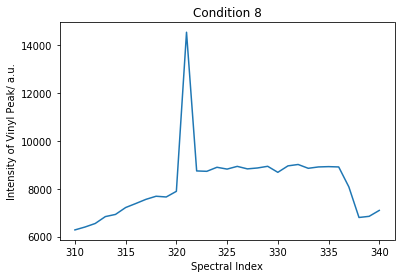

In [27]:
# Condition
df.loc[310:340,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8')
plt.show()

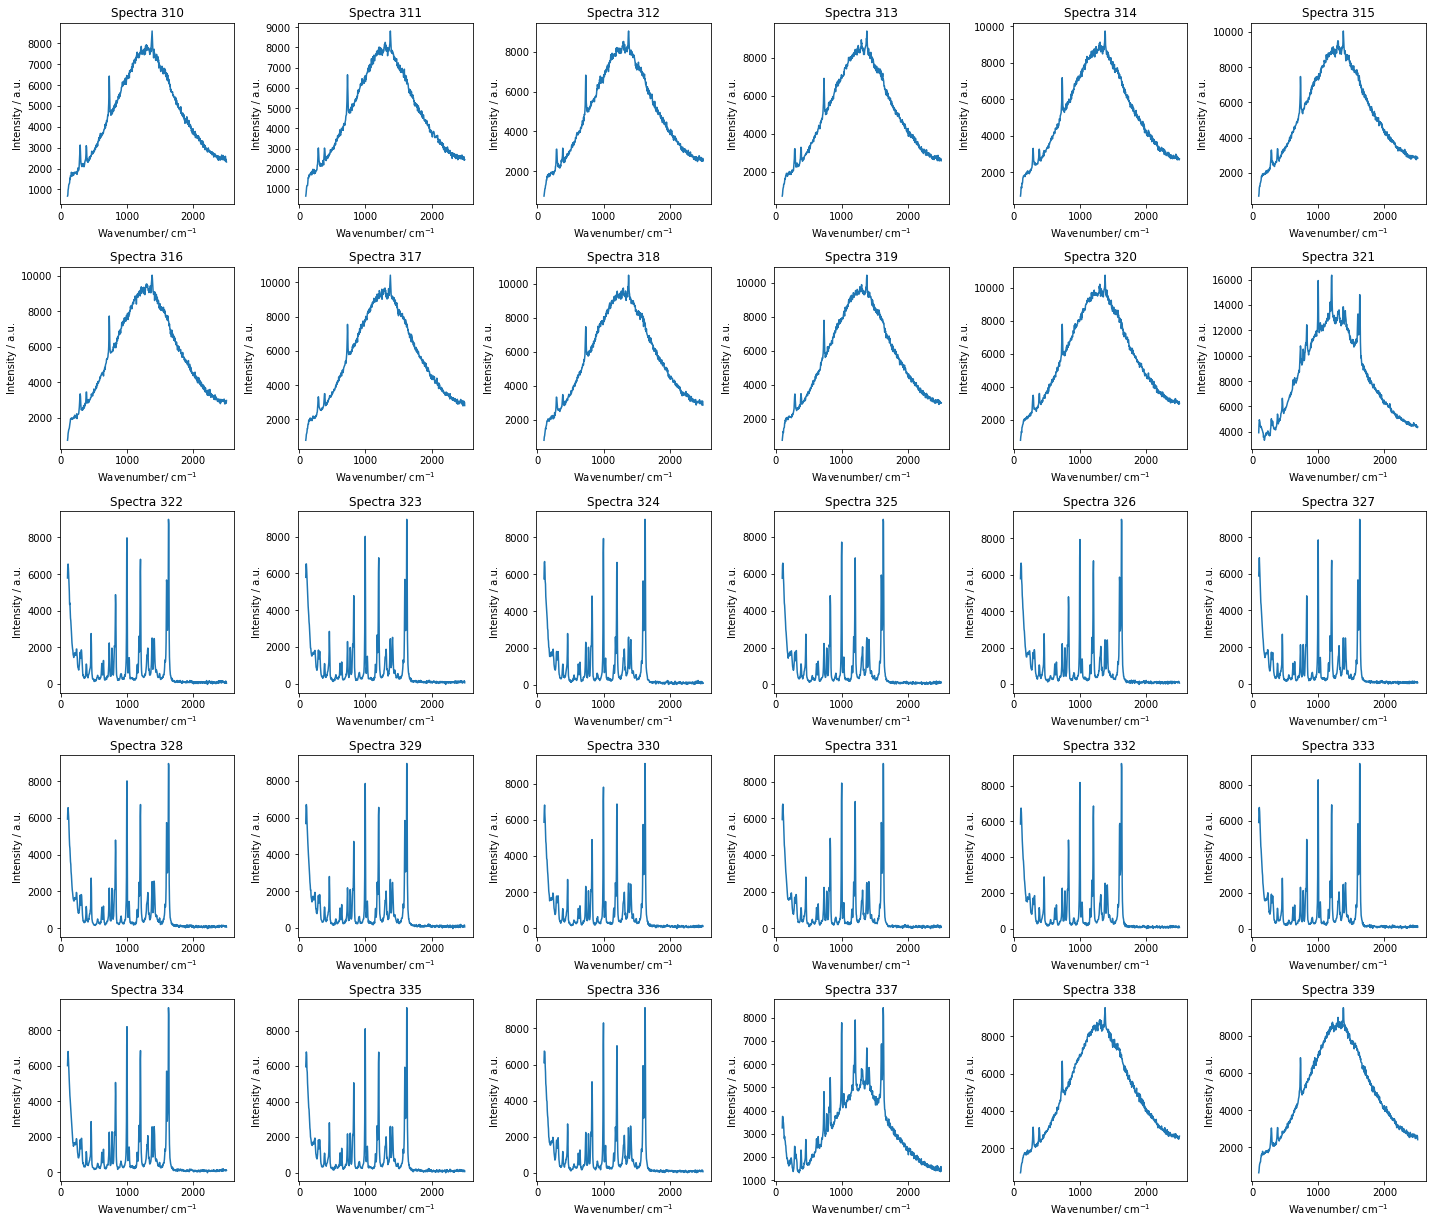

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(310, 340):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-309))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[328:332, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =8)
condition8_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
328,8,5941.0,6472.0,6565.0,6263.0,5959.0,5334.0,4916.0,4504.0,4346.0,...,80.0,62.0,76.0,95.0,76.0,129.0,103.0,125.0,133.0,52.0
329,8,5678.0,6628.0,6707.0,6573.0,5830.0,5392.0,4970.0,4625.0,4249.0,...,110.0,39.0,105.0,63.0,82.0,131.0,113.0,131.0,151.0,51.0
330,8,5875.0,6558.0,6830.0,6266.0,5925.0,5380.0,4822.0,4670.0,4277.0,...,104.0,69.0,141.0,54.0,87.0,108.0,150.0,150.0,96.0,97.0
331,8,5933.0,6688.0,6778.0,6454.0,6053.0,5475.0,4808.0,4536.0,4363.0,...,134.0,17.0,110.0,47.0,96.0,149.0,92.0,35.0,116.0,76.0
332,8,5845.0,6698.0,6738.0,6491.0,5901.0,5522.0,4923.0,4572.0,4208.0,...,93.0,44.0,75.0,129.0,45.0,109.0,116.0,136.0,124.0,59.0


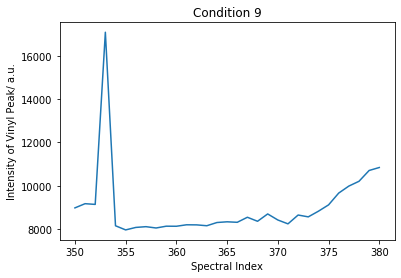

In [30]:
# Condition
df.loc[350:380,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9')
plt.show()

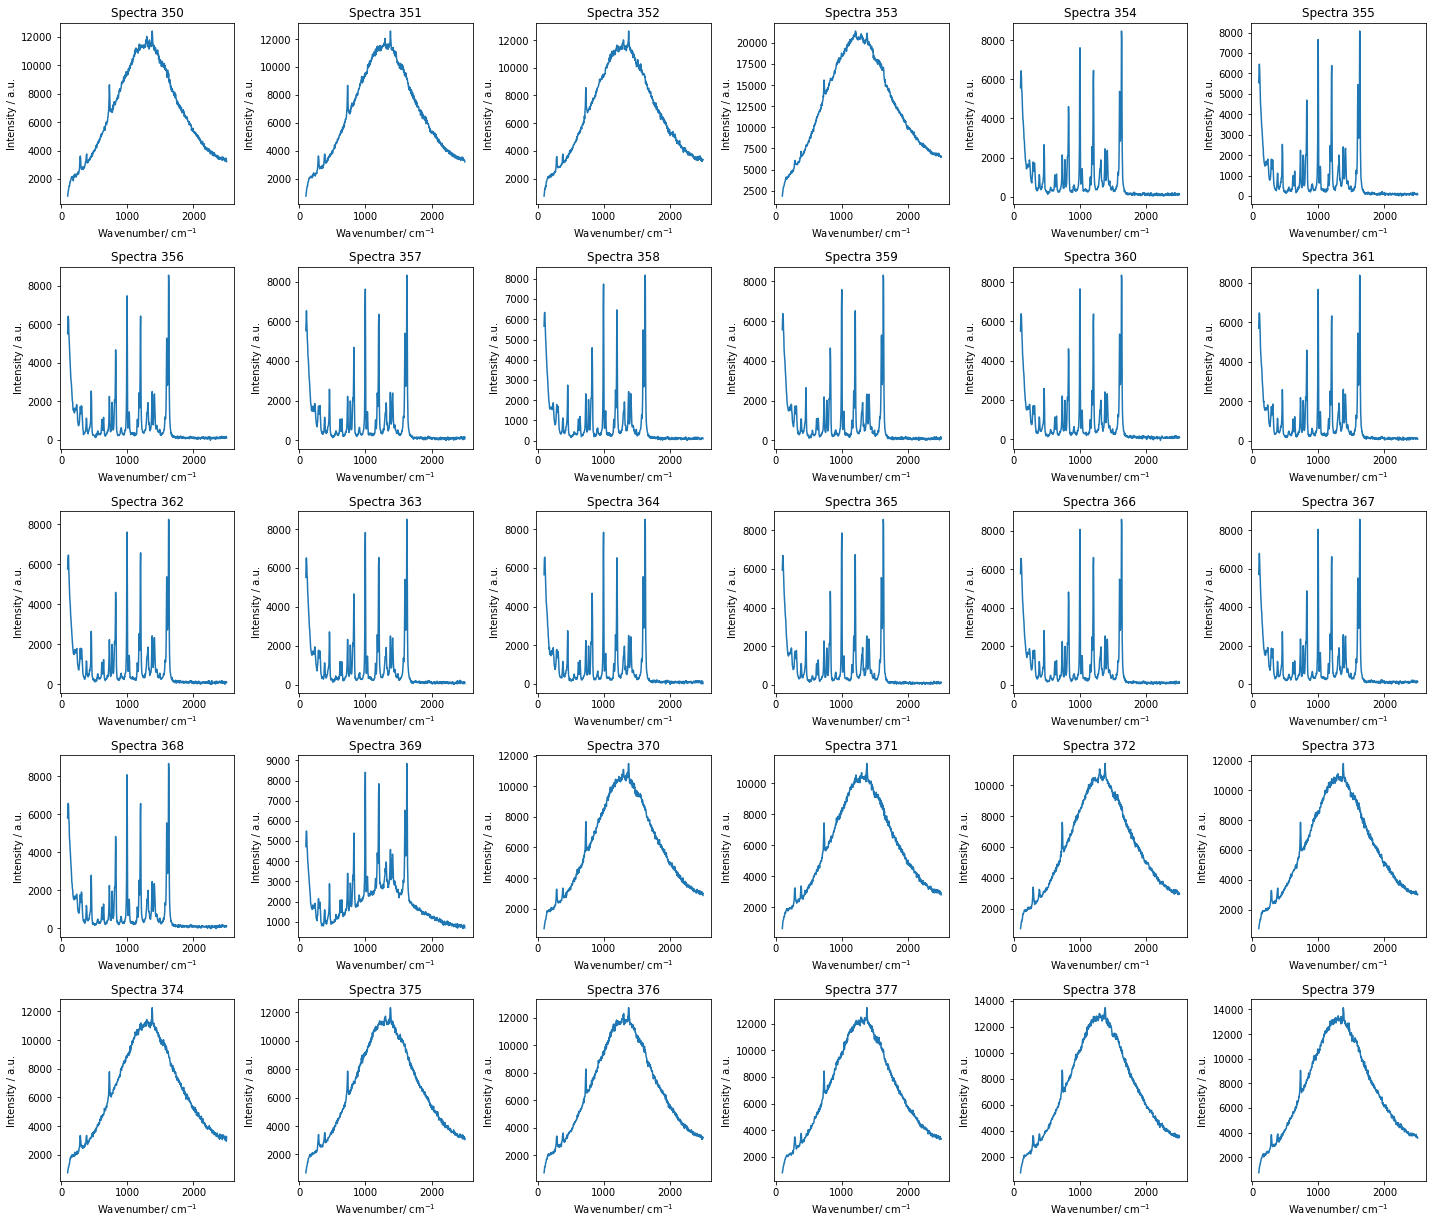

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(350, 380):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(6,6,(i-349))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[361:365, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =9)
condition9_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
361,9,5698.0,6321.0,6471.0,6325.0,5827.0,5324.0,4634.0,4356.0,4146.0,...,97.0,79.0,113.0,126.0,115.0,90.0,119.0,118.0,120.0,77.0
362,9,5756.0,6261.0,6447.0,6445.0,5633.0,5287.0,4720.0,4342.0,4121.0,...,101.0,0.0,132.0,90.0,93.0,55.0,101.0,96.0,126.0,88.0
363,9,5520.0,6453.0,6519.0,6178.0,5616.0,5424.0,4841.0,4529.0,4190.0,...,101.0,37.0,79.0,118.0,104.0,106.0,149.0,77.0,133.0,57.0
364,9,5657.0,6452.0,6559.0,6405.0,5928.0,5359.0,4770.0,4328.0,4079.0,...,142.0,10.0,118.0,163.0,77.0,91.0,122.0,139.0,110.0,24.0
365,9,5941.0,6423.0,6698.0,6344.0,5820.0,5428.0,4838.0,4522.0,4131.0,...,73.0,58.0,105.0,68.0,110.0,120.0,153.0,158.0,105.0,102.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
103,1,5489.0,6203.0,6250.0,5976.0,5345.0,5080.0,4461.0,4223.0,3902.0,...,305.0,237.0,240.0,262.0,240.0,273.0,271.0,290.0,341.0,224.0
104,1,5916.0,6719.0,6744.0,6355.0,5875.0,5275.0,4721.0,4271.0,4076.0,...,152.0,43.0,148.0,111.0,118.0,78.0,81.0,126.0,135.0,105.0
105,1,5925.0,6504.0,6762.0,6395.0,5939.0,5333.0,4614.0,4464.0,3992.0,...,123.0,36.0,79.0,111.0,124.0,104.0,141.0,120.0,134.0,80.0
106,1,5848.0,6371.0,6569.0,6432.0,5708.0,5268.0,4717.0,4287.0,4102.0,...,100.0,62.0,127.0,63.0,108.0,116.0,100.0,92.0,116.0,100.0
107,1,5728.0,6429.0,6689.0,6217.0,5782.0,5195.0,4674.0,4483.0,4093.0,...,70.0,39.0,135.0,101.0,148.0,133.0,107.0,96.0,107.0,22.0
132,2,5560.0,6136.0,6403.0,6055.0,5541.0,5205.0,4591.0,4121.0,3947.0,...,88.0,93.0,153.0,67.0,70.0,118.0,112.0,76.0,163.0,84.0
133,2,5577.0,6098.0,6344.0,6185.0,5473.0,5162.0,4512.0,4125.0,3960.0,...,58.0,26.0,121.0,65.0,129.0,101.0,161.0,144.0,146.0,62.0
134,2,5716.0,6153.0,6258.0,6009.0,5381.0,5048.0,4527.0,4173.0,3982.0,...,135.0,38.0,125.0,97.0,121.0,71.0,96.0,168.0,123.0,47.0
135,2,5674.0,6416.0,6263.0,6063.0,5600.0,4992.0,4534.0,4268.0,3778.0,...,53.0,22.0,117.0,66.0,107.0,131.0,66.0,97.0,108.0,31.0
136,2,5636.0,6222.0,6374.0,6180.0,5512.0,4941.0,4612.0,4200.0,3862.0,...,48.0,43.0,92.0,110.0,126.0,144.0,93.0,126.0,176.0,122.0


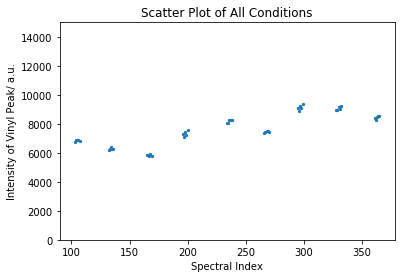

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions')
plt.ylim(0, 15000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
103,1,5489.0,6203.0,6250.0,5976.0,5345.0,5080.0,4461.0,4223.0,3902.0,...,305.0,237.0,240.0,262.0,240.0,273.0,271.0,290.0,341.0,224.0
104,1,5916.0,6719.0,6744.0,6355.0,5875.0,5275.0,4721.0,4271.0,4076.0,...,152.0,43.0,148.0,111.0,118.0,78.0,81.0,126.0,135.0,105.0
105,1,5925.0,6504.0,6762.0,6395.0,5939.0,5333.0,4614.0,4464.0,3992.0,...,123.0,36.0,79.0,111.0,124.0,104.0,141.0,120.0,134.0,80.0
106,1,5848.0,6371.0,6569.0,6432.0,5708.0,5268.0,4717.0,4287.0,4102.0,...,100.0,62.0,127.0,63.0,108.0,116.0,100.0,92.0,116.0,100.0
107,1,5728.0,6429.0,6689.0,6217.0,5782.0,5195.0,4674.0,4483.0,4093.0,...,70.0,39.0,135.0,101.0,148.0,133.0,107.0,96.0,107.0,22.0
132,2,5560.0,6136.0,6403.0,6055.0,5541.0,5205.0,4591.0,4121.0,3947.0,...,88.0,93.0,153.0,67.0,70.0,118.0,112.0,76.0,163.0,84.0
133,2,5577.0,6098.0,6344.0,6185.0,5473.0,5162.0,4512.0,4125.0,3960.0,...,58.0,26.0,121.0,65.0,129.0,101.0,161.0,144.0,146.0,62.0
134,2,5716.0,6153.0,6258.0,6009.0,5381.0,5048.0,4527.0,4173.0,3982.0,...,135.0,38.0,125.0,97.0,121.0,71.0,96.0,168.0,123.0,47.0
135,2,5674.0,6416.0,6263.0,6063.0,5600.0,4992.0,4534.0,4268.0,3778.0,...,53.0,22.0,117.0,66.0,107.0,131.0,66.0,97.0,108.0,31.0
136,2,5636.0,6222.0,6374.0,6180.0,5512.0,4941.0,4612.0,4200.0,3862.0,...,48.0,43.0,92.0,110.0,126.0,144.0,93.0,126.0,176.0,122.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.124559']].groupby('Condition').describe()

1629.124559                                                      \
                count    mean         std     min     25%     50%     75%   
Condition                                                                   
1                 5.0  6950.4  116.654618  6846.0  6871.0  6904.0  7000.0   
2                 5.0  6339.4  146.214910  6169.0  6209.0  6375.0  6433.0   
3                 5.0  5764.2   70.701485  5666.0  5715.0  5794.0  5815.0   
4                 5.0  7217.4  144.333988  7009.0  7156.0  7257.0  7269.0   
5                 5.0  8177.4   52.328768  8136.0  8153.0  8157.0  8173.0   
6                 5.0  7318.6   56.042841  7253.0  7281.0  7317.0  7345.0   
7                 5.0  8926.4  115.057812  8812.0  8824.0  8931.0  8974.0   
8                 5.0  8895.4  126.596998  8689.0  8871.0  8941.0  8959.0   
9                 5.0  8232.0   78.128100  8149.0  8189.0  8193.0  8298.0   

                   
              max  
Condition          
1          7131.0  
2          6511.0  
3          5831.0  
4          7396.0  
5          8268.0  
6          7397.0  
7          9091.0  
8          9017.0  
9          8331.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201008 High Throughput Experiment Conditions 1 to 9\Online Raman\df_t30.csv')